# Econometria Aplicada

## Aula 4 - Variáveis Instrumentais




João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

## Variáveis intrumentais

**Motivação**: \\

 Como estimar uma curva de demanda? Esta aplicação foi inspirada no texto ["Supply, Demand, and the Instrumental Variable: Lessons for Data Scientists from the Economist’s Toolbox"](https://towardsdatascience.com/supply-demand-and-the-instrumental-variable-lessons-for-data-scientists-from-the-economists-21af225187cd), utiliza dados de Epple e McCallum (2006), e nos exercícios propostos por Glenn Ellison and Stephen Ryan [.Aqui](https://ocw.mit.edu/courses/14-271-industrial-organization-i-fall-2005/pages/assignments/). \
 \

 Epple, D., & McCallum, B. T. (2006). Simultaneous equation econometrics: the missing example. Economic Inquiry, 44(2), 374-384.

### Pacotes

In [1]:
install.packages("broom")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(broom)

### Dados

In [4]:
url <- "https://github.com/costafilhojoao/Teaching/raw/main/Econometria%20Aplicada/Dados/broiler.csv"

download.file(url, "broiler.csv")

In [5]:
dat <- read.csv("broiler.csv")

Veja os primeiros 10 elementos da base de dados:

In [12]:
head(dat,10)

,YEAR,Q,Y,PCHICK,PBEEF,PCOR,PF,CPI,QPRODA,POP,MEATEX,TIME
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
1,1960,19.2,9210,52.4,33.5,46.0,51.53361,29.6,4333602,180.671,50,51
2,1961,20.6,9361,47.4,33.0,45.1,51.86824,29.9,4944130,183.691,49,52
3,1962,20.6,9666,50.0,34.2,44.8,52.09133,30.2,4997189,186.538,46,53
4,1963,21.1,9886,49.3,33.8,49.8,50.97588,30.6,5269019,189.242,80,54
5,1964,21.3,10456,48.2,32.8,49.9,50.75279,31.0,5443769,191.889,78,55
6,1965,22.9,10965,49.8,34.4,51.8,50.97588,31.5,5871560,194.303,49,56
7,1966,24.5,11417,52.7,36.2,54.5,52.48173,32.4,6437127,196.560,44,57
8,1967,25.1,11776,48.8,36.4,51.7,51.86824,33.4,6552305,198.712,45,58
9,1968,25.2,12196,51.2,37.9,45.5,49.52580,34.8,6653319,200.706,59,59


Veja os últimos 10 elementos da base de dados:

In [13]:
tail(dat,10)

,YEAR,Q,Y,PCHICK,PBEEF,PCOR,PF,CPI,QPRODA,POP,MEATEX,TIME
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
31,1990,42.4,20058,134.9,128.8,100.9,130.9534,130.7,18429897,249.973,564,81
32,1991,44.1,19873,131.7,132.4,97.0,126.6589,136.2,19591105,253.336,667,82
33,1992,46.5,20220,131.9,132.3,96.0,125.3761,140.3,20903765,256.677,786,83
34,1993,48.2,20235,138.0,137.1,92.9,131.3995,144.5,22014911,260.037,780,84
35,1994,48.8,20507,140.1,136.0,100.1,136.4748,148.2,23666035,263.226,980,85
36,1995,48.2,20798,142.2,134.9,109.0,138.4826,152.4,24827130,266.364,1183,86
37,1996,48.8,21072,152.6,134.5,158.5,174.3442,156.9,26123767,269.485,1291,87
38,1997,49.5,21470,158.5,136.8,110.1,157.7798,160.5,27041394,272.756,1443,88
39,1998,49.8,22359,159.6,136.5,91.7,128.9456,163.0,27612361,275.955,1543,89


Veja a estrutura dos dados:

In [17]:
str(dat)    #Estrurura da tabela (status dos dados)

'data.frame':	40 obs. of  12 variables:
 $ YEAR  : int  1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...
 $ Q     : num  19.2 20.6 20.6 21.1 21.3 22.9 24.5 25.1 25.2 26.3 ...
 $ Y     : int  9210 9361 9666 9886 10456 10965 11417 11776 12196 12451 ...
 $ PCHICK: num  52.4 47.4 50 49.3 48.2 49.8 52.7 48.8 51.2 54.1 ...
 $ PBEEF : num  33.5 33 34.2 33.8 32.8 34.4 36.2 36.4 37.9 41.7 ...
 $ PCOR  : num  46 45.1 44.8 49.8 49.9 51.8 54.5 51.7 45.5 49.3 ...
 $ PF    : num  51.5 51.9 52.1 51 50.8 ...
 $ CPI   : num  29.6 29.9 30.2 30.6 31 31.5 32.4 33.4 34.8 36.7 ...
 $ QPRODA: int  4333602 4944130 4997189 5269019 5443769 5871560 6437127 6552305 6653319 7174882 ...
 $ POP   : num  181 184 187 189 192 ...
 $ MEATEX: int  50 49 46 80 78 49 44 45 59 87 ...
 $ TIME  : int  51 52 53 54 55 56 57 58 59 60 ...


Variáveis:

* YEAR: ano
* Q: quantidade de frango grelhado ('broiled chicken')
* Y: renda disponível real per capita
* PCHICK: Preço do frango grelhado ('broiled chicken')
* PBEEF: preço da carne bovina
* PCOR: preço do milho
* PF: preço da ração do frango
* CPI: índice de inflação ao conumidor
* QPRODUA: quantidade agregada de frango
* POP: população dos EUA
* MEATEX: quantidade exportada de carne bovina, vitela e suína em libras

# Preço vs Quantidade

### Visualização dos dados

Faça um gráfico de dispersão entre a quantidade (Q) e o preço (PCHICK):

In [18]:
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'


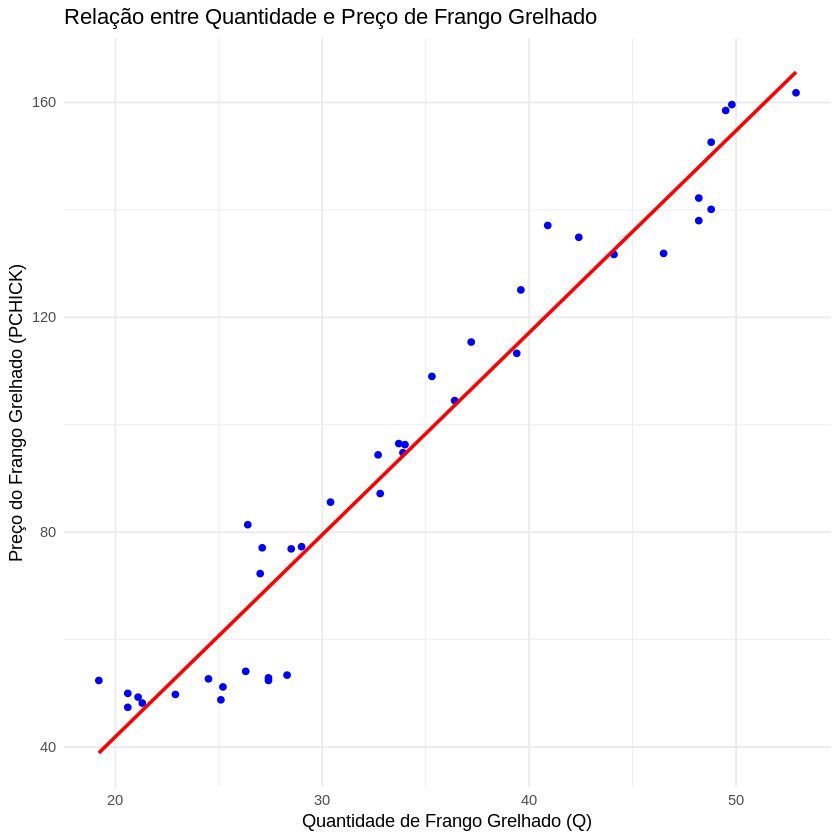

In [29]:
# Suponha que os dados estejam em um data frame chamado "dados"
# Exemplo de dados:
# dados <- data.frame(
#   YEAR = c(2000, 2001, 2002, ...),
#   Q = c(100, 120, 140, ...),
#   PCHICK = c(2.5, 2.7, 2.8, ...)
# )

# Criar o gráfico de dispersão
ggplot(dat, aes(x = Q, y = PCHICK)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Relação entre Quantidade e Preço de Frango Grelhado",
       y = "Preço do Frango Grelhado (PCHICK)",
       x = "Quantidade de Frango Grelhado (Q)") +
  theme_minimal()


## Modelo de regressão linear

Vamos estimar a regressão abaixo:

\begin{equation}
\ln \big[ Q \big]_i = \beta_0 + \beta_1 \ln \big[ PCHICK \big]_i + \epsilon_i
\end{equation}



Qual é a conclusão que obtemos?

## Modelo de regressão com variáveis instrumentais

### [1] Primeiro estágio



Vamos estimar a regressão abaixo:

\begin{equation}
PCHICK_i = \beta_0 + \beta_1 PF_i + \beta_2 PCOR_i + v_i.
\end{equation}

Será que o instrumento é relevante?

Agora, vamos criar uma previsão (o fit do modelo) com base na regressão anterior. Vamos utilizar a função 'predict', na qual criamos uma variável com 'predict( modelo )', onde 'modelo' é o nome do modelo que queremos utilizar (no nosso caso, o modelo anterior).

Adicione a variável acima à base de dados 'dat'.

### [2] Segundo estágio (sem controles)

Vamos estimar a regressão abaixo:

\begin{equation}
\ln \big[ Q \big]_i = \beta_0 + \beta_1 \ln \big[ \hat{PCHICK} \big]_i + u_i.
\end{equation}

### [3] Segundo estágio (alguns controles):



\begin{equation}
\ln \big[ Q \big]_i = \beta_0 + \beta_1 * \ln \big[ \hat{PCHICK} \big]_i + \beta_2 \ln \big[ Y \big]_i  + \beta_3 PBEEF_i + \varepsilon_i.
\end{equation}

### [4] Segundo estágio (modelo completo):

\begin{equation}
\ln \big[ Q \big]_i = \beta_0 + \beta_1 * \ln \big[ \hat{PCHICK} \big]_i + \beta_2 \ln \big[ Y \big]_i  + \beta_3 \ln \big[ CPI \big]_i + \beta_4 PBEEF_i + \beta_4 POP_i + \varepsilon_i.
\end{equation}